In [11]:
import os
import math
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import subplots
import plotly.graph_objs as go
print(__version__)
import cufflinks as cf
# Para Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

4.6.0


In [103]:
xrd = pd.read_csv('TiO2.txt', skiprows = 134, skipinitialspace=True)
xrd.dropna(axis=1, inplace=True)

In [104]:
xrd.iplot(kind='scatter', x='Angle', y='Det1Disc1', name = "Sample")

In [105]:
def pvoigt(x, A, mu, sigma, alpha, K):
    sigmag=sigma*math.sqrt(2*math.log(2))
    return ((1-alpha)*A/(sigmag*math.sqrt(2*math.pi))) * (np.exp(-(x-mu)**2 / (2*sigmag**2))) + (alpha*A/math.pi)*(sigma/((x - mu)**2 + sigma**2)) + K

In [106]:
a_point = int(xrd[xrd['Angle']==int(input('Ponto a: '))].index[0])
b_point = int(xrd[xrd['Angle']==int(input('Ponto b: '))].index[0])

Ponto a: 23
Ponto b: 27


In [107]:
print(f'a: {a_point}, b: {b_point}')

a: 360, b: 440


In [108]:
xpv = xrd['Angle'][a_point:b_point].reset_index()
xpv.drop(columns = 'index', inplace = True)
xData = xpv['Angle']

ypv = xrd['Det1Disc1'][a_point:b_point].reset_index()
ypv.drop(columns = 'index', inplace = True)
yData = ypv['Det1Disc1']

ip = [max(yData),
      np.mean(xData),
      0.5, 0, min(yData)]

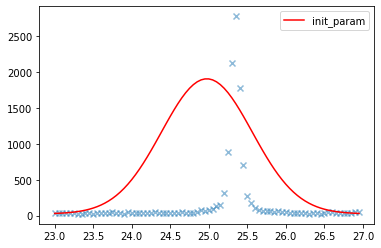

In [109]:
n = len(xData)
y = np.empty(n)
for i in range(n):
    y[i] = pvoigt(xData[i], ip[0], ip[1], ip[2], ip[3], ip[4])
plt.scatter(xData, yData, alpha = 0.5, marker = 'x')
plt.plot(xData, y, 'r', label = 'init_param')
plt.legend()

Text(0.5, 1.0, 'zoom')

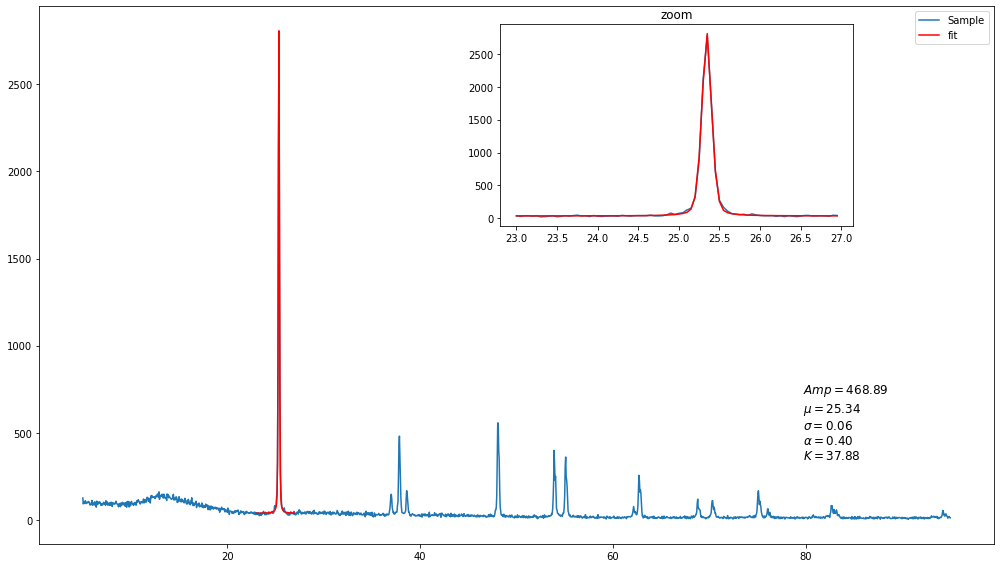

In [110]:
a = xData.values
s = yData.values
c, cov = curve_fit(pvoigt, a, s, ip)
for i in range(n):
    y[i] = pvoigt(xData[i], c[0], c[1], c[2], c[3], c[4])


fig, ax = plt.subplots(figsize = (14, 8))

ax.plot(xrd['Angle'], xrd['Det1Disc1'], label = 'Sample')
ax.plot(xData, y, 'r', label = 'fit')
plt.legend()
fig.tight_layout()
# textstr = f'Amplitude: {c[0]:3.3f},\n Média mu: {c[1]:3.3f},\n Sigma: {c[2]:3.3f},\n Alpha: {c[3]:3.3f},\n K (offset): {c[4]:3.3f}'
textstr = '\n'.join((
    r'$Amp=%.2f$' % (c[0], ),
    r'$\mu=%.2f$' % (c[1], ),
    r'$\sigma=%.2f$' % (c[2], ),
    r'$\alpha=%.2f$' % (c[3], ),
    r'$K=%.2f$' % (c[4], )))
ax.text(0.8, 0.3, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top')

inset_ax = fig.add_axes([0.5, 0.6, 0.35, 0.35]) # X, Y, largura, altura
inset_ax.plot(xData, yData)
inset_ax.plot(xData, y, 'r')
inset_ax.set_title('zoom')

